<a href="https://colab.research.google.com/github/AlexeyProvorov/NeuroMind/blob/main/Latent_space_of_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

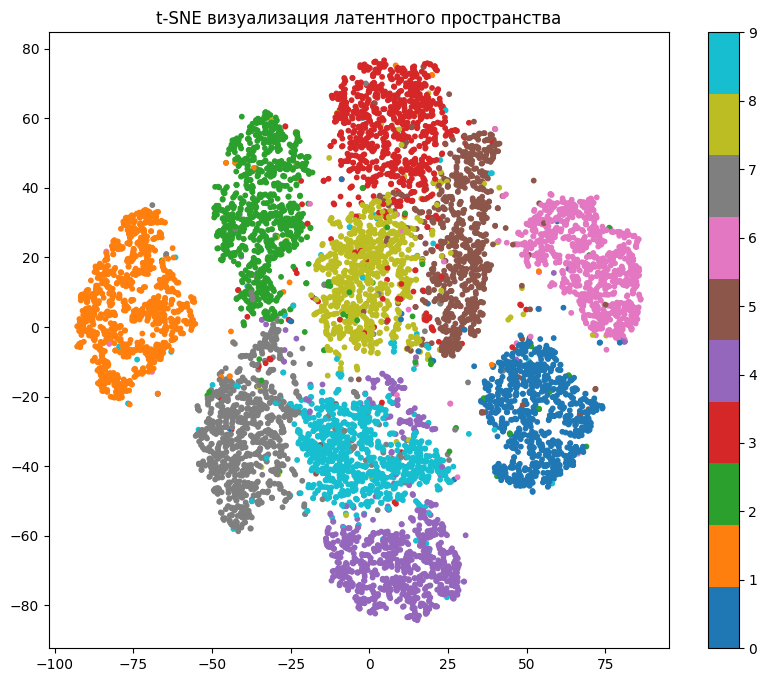

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from torch.utils.data import DataLoader

# Подготовка тестовых данных
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Извлечение латентных векторов для тестовых данных
vae.eval()  # Перевод модели в режим оценки
latent_vectors = []
labels = []

with torch.no_grad():
    for images, targets in test_loader:
        images = images.view(-1, input_dim)  # Преобразование изображений в вектор
        encoded = vae.encoder(images)
        mu, logvar = torch.chunk(encoded, 2, dim=-1)
        latent_vectors.append(mu)  # Сохраняем только средние значения (mu)
        labels.append(targets)

latent_vectors = torch.cat(latent_vectors).cpu().numpy()  # Преобразуем в NumPy для работы с t-SNE
labels = torch.cat(labels).cpu().numpy()

# Применение t-SNE для снижения размерности до 2D для визуализации
tsne = TSNE(n_components=2, random_state=42)
latent_2d = tsne.fit_transform(latent_vectors)

# Визуализация
plt.figure(figsize=(10, 8))
scatter = plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=labels, cmap='tab10', s=10)
plt.colorbar(scatter)
plt.title("t-SNE визуализация латентного пространства")
plt.show()
